# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 11/9/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 11/9/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,1265,38928341,3.2
Albania,5002,2877800,173.8
Algeria,5987,43851043,13.7
Andorra,1027,77265,1329.2
Angola,2809,32866268,8.5
Antigua and Barbuda,7,97928,7.1
Argentina,133890,45195777,296.2
Armenia,27056,2963234,913.1
Australia,116,25459700,0.5


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Belgium,155893,11589616,1345.1
Luxembourg,8343,625976,1332.8
Andorra,1027,77265,1329.2
Czechia,133148,10708982,1243.3
Switzerland,102180,8654618,1180.6
Montenegro,6517,628062,1037.6
Liechtenstein,373,38137,978.1
Slovenia,20022,2078932,963.1
France,612050,65273512,937.7


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

11/5/20    631172.0
11/6/20    653992.0
11/7/20    668114.0
11/8/20    682624.0
11/9/20    689146.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

10/27/20        NaN
10/28/20    16202.0
10/29/20    18733.0
10/30/20    19382.0
10/31/20    14054.0
11/1/20     12556.0
11/2/20     25252.0
11/3/20      7533.0
11/4/20     31480.0
11/5/20     22561.0
11/6/20     22820.0
11/7/20     14122.0
11/8/20     14510.0
11/9/20      6522.0
Name: Germany, dtype: float64

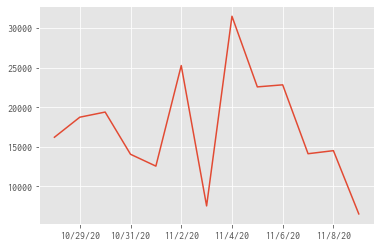

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

269.4155783664758